In [1]:
%%capture
!pip install -r requirements.txt

In [2]:
import pandas as pd
from model import Model
from agent import Agent
import yfinance as yf

In [3]:
window_size = 30
layer_size = 500
output_size = 3
money = 10000
skip = 1
iterations = 500
checkpoint = 10
commission_rate = 0.00075
ticker = "BTC-USD"
period = "1y"

In [4]:
df = yf.Ticker(ticker).history(period=period)
close = df.Close.values.tolist()
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,17158194786,0,0
2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,18720708479,0,0
2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,17082040705,0,0
2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,14797485769,0,0
2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,21664240918,0,0


In [5]:
model = Model(window_size, layer_size, output_size)
agent = Agent(model, money, close, window_size, skip, commission_rate)
agent.fit(iterations, checkpoint)

iter 10. reward: 182.037654
iter 20. reward: 373.211009
iter 30. reward: 409.969066
iter 40. reward: 337.141656
iter 50. reward: 424.802126
iter 60. reward: 774.267553
iter 70. reward: 1024.708665
iter 80. reward: 982.516481
iter 90. reward: 863.545490
iter 100. reward: 1066.324713
iter 110. reward: 1135.155897
iter 120. reward: 1149.537255
iter 130. reward: 1308.799194
iter 140. reward: 1191.267843
iter 150. reward: 1225.557853
iter 160. reward: 1477.123006
iter 170. reward: 1482.200364
iter 180. reward: 1514.968935
iter 190. reward: 1635.803920
iter 200. reward: 1639.365138
iter 210. reward: 1656.371087
iter 220. reward: 1576.521189
iter 230. reward: 1574.607725
iter 240. reward: 1637.844566
iter 250. reward: 1679.560753
iter 260. reward: 1557.978619
iter 270. reward: 1585.011891
iter 280. reward: 1643.059663
iter 290. reward: 1567.455769
iter 300. reward: 1602.157238
iter 310. reward: 1638.578512
iter 320. reward: 1656.313543
iter 330. reward: 1648.562581
iter 340. reward: 1785.2748

In [6]:
agent.simulate()

day 1: buy 1 units at price 10000.000000, total balance 0.000000, quantity 1.345920
day 2: buy 0 units at price 0.000000, total balance 0.000000, quantity 1.345920
day 3: buy 0 units at price 0.000000, total balance 0.000000, quantity 1.345920
day 4: buy 0 units at price 0.000000, total balance 0.000000, quantity 1.345920
day 5, sell 1 units at price 10017.309459, investment 0.173095 %, total balance 10017.309459, quantity 0.000000
day 7, sell 0 units at price 0.000000, investment 0.000000 %, total balance 10017.309459, quantity 0.000000
day 10, sell 0 units at price 0.000000, investment 0.000000 %, total balance 10017.309459, quantity 0.000000
day 11: buy 1 units at price 7222.840317, total balance 2794.469142, quantity 1.000000
day 12: buy 0 units at price 2794.469142, total balance 0.000000, quantity 1.385520
day 13, sell 1 units at price 10064.740885, investment 0.000000 %, total balance 10064.740885, quantity 0.000000
day 14: buy 1 units at price 10064.740885, total balance 0.0000

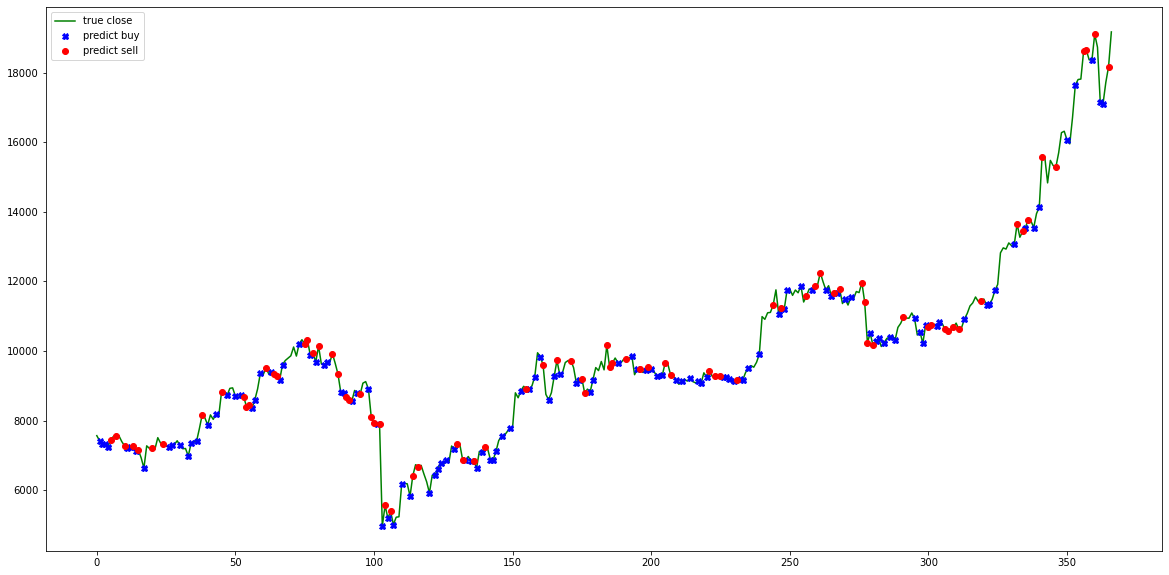

In [7]:
agent.print_history()

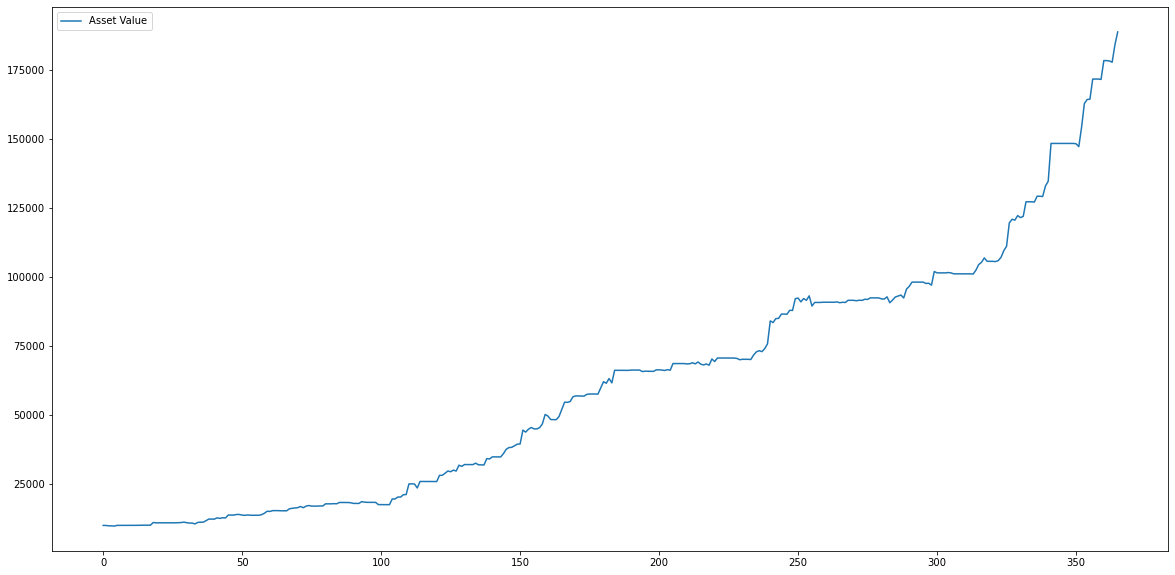

In [8]:
agent.print_asset_value()